1) Escolha matrizes simétricas A 2X2 e B 3X3, de forma a conter apenas os algarismos do seu RA(*).
a)Encontre seus autovalores e autovetores..
b) Descreva o efeito geométrico das transformações no plano e no espaço associadas e ilustre no
computador com a imagem de uma circunferência e de uma esfera centrada na origem.
c) Calcule A^1000 e B^1000, A^-1 e B^-1 usando a diagonalização.

In [2]:
import numpy as np

In [3]:
# Definir a matriz A
A = np.array([[0, 3], [3, 7]])

# Calcular autovalores e autovetores de A
eigvals_A, eigvecs_A = np.linalg.eig(A)

# Definir a matriz B
B = np.array([[0, 3, 7], [3, 3, 8], [7, 8, 2]])

# Calcular autovalores e autovetores de B
eigvals_B, eigvecs_B = np.linalg.eig(B)

# Printar resultados de forma organizada
print("Matriz A:")
print(A)
print("\nAutovalores de A:")
for i, val in enumerate(eigvals_A):
    print(f"λ{i+1} = {val:.4f}")

print("\nAutovetores de A:")
for i, vec in enumerate(eigvecs_A.T):  # Transpose to iterate over columns
    print(f"v{i+1} = {vec}")

print("\n-----------------------------------\n")

print("Matriz B:")
print(B)
print("\nAutovalores de B:")
for i, val in enumerate(eigvals_B):
    print(f"λ{i+1} = {val:.4f}")

print("\nAutovetores de B:")
for i, vec in enumerate(eigvecs_B.T):  # Transpose to iterate over columns
    print(f"v{i+1} = {vec}")


Matriz A:
[[0 3]
 [3 7]]

Autovalores de A:
λ1 = -1.1098
λ2 = 8.1098

Autovetores de A:
v1 = [-0.93788501  0.34694625]
v2 = [-0.34694625 -0.93788501]

-----------------------------------

Matriz B:
[[0 3 7]
 [3 3 8]
 [7 8 2]]

Autovalores de B:
λ1 = 14.0924
λ2 = -1.6249
λ3 = -7.4675

Autovetores de B:
v1 = [-0.45493751 -0.59857238 -0.65935041]
v2 = [-0.71720064  0.68516743 -0.12715672]
v3 = [-0.52787793 -0.41503818  0.74100486]


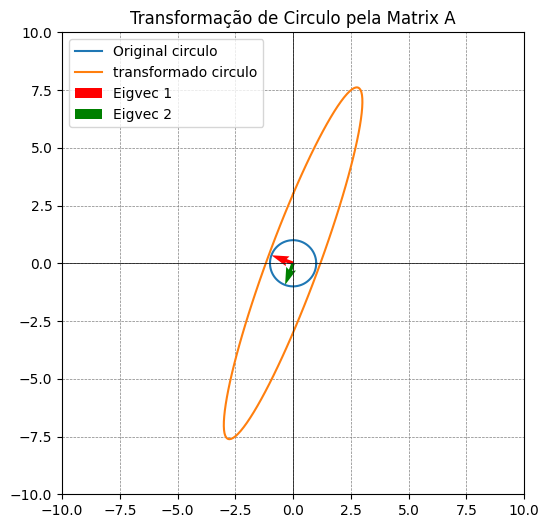

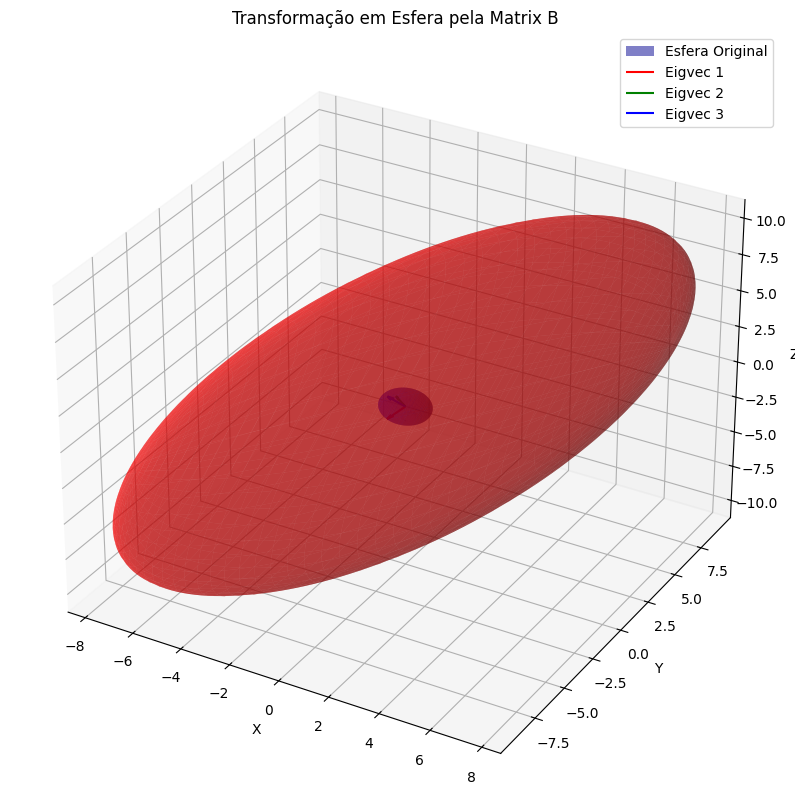

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_circulo_e_transform(A, eigvecs_A):
    theta = np.linspace(0, 2*np.pi, 100)
    circulo = np.array([np.cos(theta), np.sin(theta)])
    transformado_circulo = A @ circulo

    plt.figure(figsize=(6, 6))
    plt.plot(circulo[0, :], circulo[1, :], label='Original circulo')
    plt.plot(transformado_circulo[0, :], transformado_circulo[1, :], label='transformado circulo')
    plt.quiver(0, 0, eigvecs_A[0, 0], eigvecs_A[1, 0], angles='xy', scale_units='xy', scale=1, color='r', label='Eigvec 1')
    plt.quiver(0, 0, eigvecs_A[0, 1], eigvecs_A[1, 1], angles='xy', scale_units='xy', scale=1, color='g', label='Eigvec 2')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title('Transformação de Circulo pela Matrix A')
    plt.show()

def plot_sphere_e_transform(B, eigvecs_B):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, color='b', alpha=0.5, label='Esfera Original')

    transformado = np.dot(B, np.array([x.flatten(), y.flatten(), z.flatten()]))
    x_transformado = transformado[0, :].reshape(x.shape)
    y_transformado = transformado[1, :].reshape(y.shape)
    z_transformado = transformado[2, :].reshape(z.shape)
    
    ax.plot_surface(x_transformado, y_transformado, z_transformado, color='r', alpha=0.5)
    
    for i in range(3):
        eigvec = eigvecs_B[:, i]
        ax.quiver(0, 0, 0, eigvec[0], eigvec[1], eigvec[2], color=['r', 'g', 'b'][i], label=f'Eigvec {i+1}')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('Transformação em Esfera pela Matrix B')
    plt.legend()
    plt.show()

# Plotar a circunferência e a esfera transformadas
plot_circulo_e_transform(A, eigvecs_A)
plot_sphere_e_transform(B, eigvecs_B)


In [5]:
# Função para diagonalizar uma matriz e calcular sua potência e inversa
def diagonalize_and_calculate(matrix, eigvals, eigvecs, power):
    P = eigvecs
    D = np.diag(eigvals)
    P_inv = np.linalg.inv(P)
    
    # Calcular matriz elevada à potência
    D_power = np.diag(eigvals**power)
    matrix_power = P @ D_power @ P_inv
    
    # Calcular inversa da matriz
    D_inv = np.diag(1 / eigvals)
    matrix_inv = P @ D_inv @ P_inv
    
    return matrix_power, matrix_inv

# Calcular A^1000 e A^-1
A_1000, A_inv = diagonalize_and_calculate(A, eigvals_A, eigvecs_A, 1000)

# Calcular B^1000 e B^-1
B_1000, B_inv = diagonalize_and_calculate(B, eigvals_B, eigvecs_B, 1000)

# Printar resultados
def print_matrix_results(matrix, eigvals, eigvecs, power, matrix_power, matrix_inv, name):
    print(f"Matriz {name}:")
    print(matrix)
    print(f"\nAutovalores de {name}:")
    for i, val in enumerate(eigvals):
        print(f"λ{i+1} = {val:.4f}")

    print(f"\nAutovetores de {name}:")
    for i, vec in enumerate(eigvecs.T): 
        print(f"v{i+1} = {vec}")

    print(f"\n{name}^{power}:")
    print(matrix_power)

    print(f"\n{name}^-1:")
    print(matrix_inv)

    print("\n-----------------------------------\n")

# Printar resultados para A
print_matrix_results(A, eigvals_A, eigvecs_A, 1000, A_1000, A_inv, "A")

# Printar resultados para B
print_matrix_results(B, eigvals_B, eigvecs_B, 1000, B_1000, B_inv, "B")



Matriz A:
[[0 3]
 [3 7]]

Autovalores de A:
λ1 = -1.1098
λ2 = 8.1098

Autovetores de A:
v1 = [-0.93788501  0.34694625]
v2 = [-0.34694625 -0.93788501]

A^1000:
[[inf inf]
 [inf inf]]

A^-1:
[[-0.77777778  0.33333333]
 [ 0.33333333  0.        ]]

-----------------------------------

Matriz B:
[[0 3 7]
 [3 3 8]
 [7 8 2]]

Autovalores de B:
λ1 = 14.0924
λ2 = -1.6249
λ3 = -7.4675

Autovetores de B:
v1 = [-0.45493751 -0.59857238 -0.65935041]
v2 = [-0.71720064  0.68516743 -0.12715672]
v3 = [-0.52787793 -0.41503818  0.74100486]

B^1000:
[[inf inf nan]
 [inf inf nan]
 [nan nan inf]]

B^-1:
[[-0.33918129  0.29239766  0.01754386]
 [ 0.29239766 -0.28654971  0.12280702]
 [ 0.01754386  0.12280702 -0.05263158]]

-----------------------------------



C:\Users\Diogo\AppData\Local\Temp\ipykernel_11856\2657253344.py:8: RuntimeWarning: overflow encountered in power
  D_power = np.diag(eigvals**power)
C:\Users\Diogo\AppData\Local\Temp\ipykernel_11856\2657253344.py:9: RuntimeWarning: invalid value encountered in matmul
  matrix_power = P @ D_power @ P_inv


3

In [6]:
# Definir a matriz de transição A
A = np.array([
    [0.7, 0.2, 0.2],
    [0.2, 0.6, 0.3],
    [0.1, 0.2, 0.5]
])

# Definir o vetor de estado inicial
v = np.array([0.4, 0.2, 0.4])

# Função para calcular a matriz de transição após n iterações
def calculate_transition_matrix(A, n):
    return np.linalg.matrix_power(A, n)

# Função para calcular o vetor de estado após n iterações
def calculate_state_vector(A, v, n):
    A_n = calculate_transition_matrix(A, n)
    return np.dot(A_n, v)

# Calcular a matriz de transição após um grande número de iterações
n = 100  # Número de iterações (grande número)
A_n = calculate_transition_matrix(A, n)

# Calcular o vetor de estado após n iterações
v_n = calculate_state_vector(A, v, n)

# Imprimir os resultados
print("Matriz de transição A^n (n grande):")
print(A_n)

print("\nVetor de estado após n iterações (n grande):")
print(v_n)

Matriz de transição A^n (n grande):
[[0.4        0.4        0.4       ]
 [0.37142857 0.37142857 0.37142857]
 [0.22857143 0.22857143 0.22857143]]

Vetor de estado após n iterações (n grande):
[0.4        0.37142857 0.22857143]


4

In [8]:
# Definir os vetores da base inicial
v1 = np.array([-3/7, 1, 0, 0])
v2 = np.array([8/7, 0, 1, 0])
v3 = np.array([-2/7, 0, 0, 1])

# Função para aplicar o processo de Gram-Schmidt
def gram_schmidt(vectors):
    """
    Aplica o processo de Gram-Schmidt a uma lista de vetores.
    
    Args:
    vectors: Lista de vetores a serem ortogonalizados.
    
    Returns:
    basis: Lista de vetores ortonormais.
    """
    basis = []
    for v in vectors:
        # Projeta v nos vetores já ortogonalizados na base
        w = v - sum(np.dot(v, b) * b for b in basis)
        # Normaliza o vetor resultante e adiciona à base ortonormal
        basis.append(w / np.linalg.norm(w))
    return basis

# Aplicar o processo de Gram-Schmidt aos vetores v1, v2 e v3
basis = gram_schmidt([v1, v2, v3])

# Função para imprimir vetores
def print_vector(vec, name):
    formatted_vec = ', '.join([f"{component:.4f}" for component in vec])
    print(f"{name} = [{formatted_vec}]")

# Imprimir a base ortonormal resultante
print("Base ortonormal para o subespaço definido por 7x1 + 3x2 - 8x3 + 2x4 = 0:")
for i, vec in enumerate(basis):
    print_vector(vec, f"v_{i+1}")


Base ortonormal para o subespaço definido por 7x1 + 3x2 - 8x3 + 2x4 = 0:
v_1 = [-0.3939, 0.9191, 0.0000, 0.0000]
v_2 = [0.6657, 0.2853, 0.6895, 0.0000]
v_3 = [-0.1129, -0.0484, 0.1290, 0.9840]


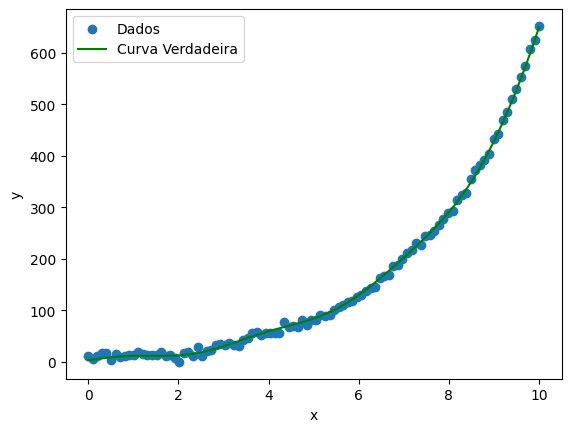

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados sintéticos
np.random.seed(0)
x = np.linspace(0, 10, 100)
y_true = 2 * x**2 + 3 * np.exp(0.5 * x) + 5 * np.sin(2 * x)
y = y_true + np.random.normal(scale=5, size=x.shape)  # Adicionar algum ruído

# Plotar os dados sintéticos
plt.scatter(x, y, label='Dados')
plt.plot(x, y_true, label='Curva Verdadeira', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

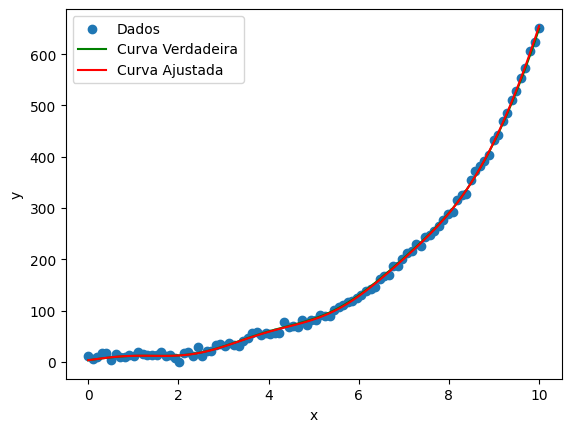

Coeficientes ajustados: a1 = 1.9035, a2 = 3.1006, a3 = 5.0534


In [10]:

from numpy.linalg import lstsq

# Definir as funções base
f1 = x**2
f2 = np.exp(0.5 * x)
f3 = np.sin(2 * x)

# Montar a matriz A
A = np.vstack([f1, f2, f3]).T

# Resolver o sistema de equações normais
coeffs, residuals, rank, s = lstsq(A, y, rcond=None)

# Coeficientes ajustados
a1, a2, a3 = coeffs

# Função ajustada
y_fit = a1 * f1 + a2 * f2 + a3 * f3

# Plotar o ajuste
plt.scatter(x, y, label='Dados')
plt.plot(x, y_true, label='Curva Verdadeira', color='green')
plt.plot(x, y_fit, label='Curva Ajustada', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(f"Coeficientes ajustados: a1 = {a1:.4f}, a2 = {a2:.4f}, a3 = {a3:.4f}")

In [11]:
# Calcular o erro quadrático médio
mse = np.mean((y - y_fit)**2)
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")

Erro Quadrático Médio (MSE): 23.5947


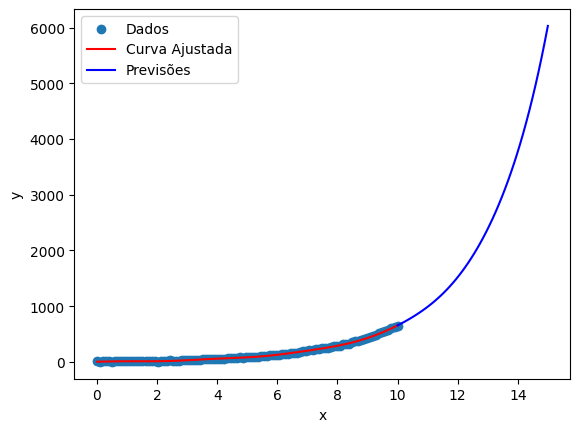

In [12]:
# Novos valores de x para previsão
x_new = np.linspace(10, 15, 50)
f1_new = x_new**2
f2_new = np.exp(0.5 * x_new)
f3_new = np.sin(2 * x_new)

# Calcular previsões
y_pred = a1 * f1_new + a2 * f2_new + a3 * f3_new

# Plotar as previsões
plt.scatter(x, y, label='Dados')
plt.plot(x, y_fit, label='Curva Ajustada', color='red')
plt.plot(x_new, y_pred, label='Previsões', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

6

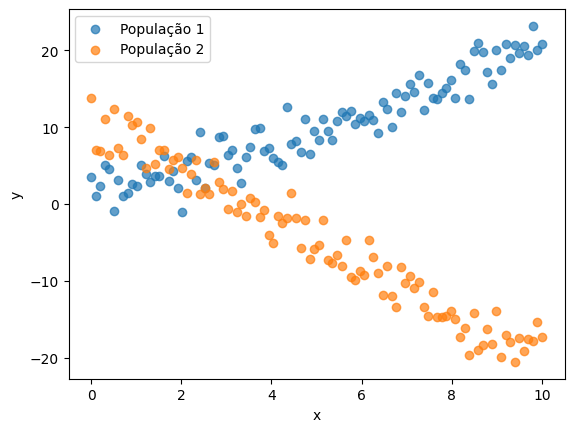

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados sintéticos para duas populações diferentes
np.random.seed(0)
x1 = np.linspace(0, 10, 100)
y1 = 2 * x1 + np.random.normal(scale=2, size=x1.shape)  # População 1

x2 = np.linspace(0, 10, 100)
y2 = -3 * x2 + 10 + np.random.normal(scale=2, size=x2.shape)  # População 2

# Plotar os dados das duas populações
plt.scatter(x1, y1, label='População 1', alpha=0.7)
plt.scatter(x2, y2, label='População 2', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [14]:
# Função para calcular o produto interno ponderado
def produto_interno_ponderado(a, b, w):
    return np.sum(w * a * b)

# Definir pesos (por exemplo, podemos usar as populações como pesos)
ponderados = np.linspace(1, 2, 100)  # População 1
ponderados2 = np.linspace(1, 3, 100) # População 2

# Calcular os produtos internos ponderados
numerador = produto_interno_ponderado(y1, y2, ponderados)
denom_a = produto_interno_ponderado(y1, y1, ponderados)
denom_b = produto_interno_ponderado(y2, y2, ponderados2)

# Calcular o fator de correlação ponderado
correlacao_ponderacao = numerador / np.sqrt(denom_a * denom_b)

print(f"Fator de Correlação Ponderado: {correlacao_ponderacao:.4f}")

Fator de Correlação Ponderado: -0.7273
